In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress
from citipy import citipy
#import openweathermapy.core as owm
import os as os
import csv
from datetime import date

# Import API key
#from api_keys import weather_api_key
#print(weather_api_key)
 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#date process was run
today = date.today()
print(today)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

2020-02-27


In [7]:
#311dataphillytop5
line_chart = pd.read_csv("final_311_census.csv", encoding="utf-8")
#line_chart.sort_values(by="CREATE_DATE", ascending=False)
line_chart.head()

,CREATED_ON,CREATE_DATE,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,X,Y,location,ZIP,...,Population_x.1,Median Age_x.1,Per Capita Income_x.1,Poverty Count_x.1,Name,Household Income_y.1,Population_y.1,Median Age_y.1,Per Capita Income_y.1,Poverty Count_y.1
0,2015-04-20T08:38:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.015178,40.392419,"40.3924186,-80.01517829999999",15226,...,13632.0,39.5,29870.0,1329.0,ZCTA5 15226,54441.0,13632.0,39.5,29870.0,1329.0
1,2015-04-20T08:42:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.018696,40.400007,"40.4000074,-80.0186958",15226,...,13632.0,39.5,29870.0,1329.0,ZCTA5 15226,54441.0,13632.0,39.5,29870.0,1329.0
2,2015-04-20T08:43:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.016089,40.399618,"40.399617799999994,-80.01608940000001",15226,...,13632.0,39.5,29870.0,1329.0,ZCTA5 15226,54441.0,13632.0,39.5,29870.0,1329.0
3,2015-04-20T09:15:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.007267,40.383212,"40.3832124,-80.0072673",15226,...,13632.0,39.5,29870.0,1329.0,ZCTA5 15226,54441.0,13632.0,39.5,29870.0,1329.0
4,2015-04-20T09:16:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.009981,40.384611,"40.3846107,-80.0099811",15226,...,13632.0,39.5,29870.0,1329.0,ZCTA5 15226,54441.0,13632.0,39.5,29870.0,1329.0


In [8]:
mean_tum_vol= line_chart.groupby("NEIGHBORHOOD")["Household Income_y"].mean()
#hh_income= line_chart.groupby("NEIGHBORHOOD")["Household Income"].mean()
count= line_chart.groupby("NEIGHBORHOOD")["REQUEST_TYPE"].count()

grp_neighbor = pd.DataFrame({"bob":mean_tum_vol, "count":count})
print(grp_neighbor.head())

                              bob  count
NEIGHBORHOOD                            
Beechview            57797.397167   3389
Brookline            53458.557791   6013
Carrick              41434.630862   5800
South Side Slopes    48010.541422   4080
Squirrel Hill South  72271.578409   3131


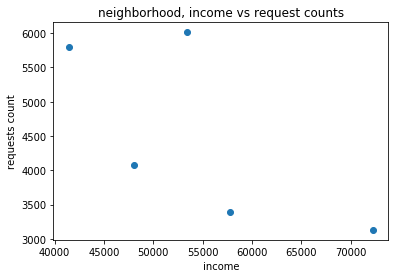

In [9]:
# Plot out rooms versus median house price
x_values = grp_neighbor['bob']
y_values = grp_neighbor['count']
plt.scatter(x_values,y_values)
plt.title(f"neighborhood, income vs request counts" )
plt.xlabel('income')
plt.ylabel('requests count')
plt.show()

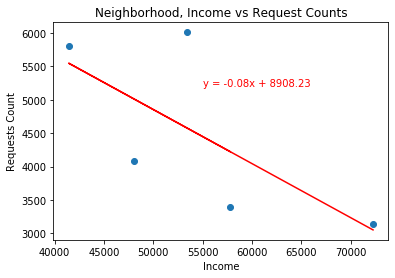

In [10]:
x_values = grp_neighbor['bob']
y_values = grp_neighbor['count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55000,5200),fontsize=10,color="red")
plt.title(f"Neighborhood, Income vs Request Counts" )
plt.xlabel('Income')
plt.ylabel('Requests Count')
plt.savefig('Neighborhood_Income_vs_Request_Counts.png')
plt.show()